In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
from keras.utils import to_categorical
from keras.optimizers import SGD
from sklearn.model_selection import StratifiedKFold, train_test_split
from keras.layers.advanced_activations import LeakyReLU
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_auc_score
from keras import regularizers
#import lightgbm as lgb

Using TensorFlow backend.


In [2]:
df = pd.read_csv('hr_attrition.csv')
#ibm_df = pd.read_csv('IBM_HR.csv')

In [10]:
training = df['TrainingTimesLastYear']
training.describe()

count    1470.000000
mean        2.799320
std         1.289271
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: TrainingTimesLastYear, dtype: float64

In [3]:
to_drop = ['Attrition', 'EmployeeCount','Over18', 'StandardHours', 'EmployeeNumber',]
labels = ['Attrition']

wages = ['DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate']

to_dummy = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']##7

categorical = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 
               'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance'] ##9

to_continous = ['Age', 'DistanceFromHome', 'HourlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
             'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 
             'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Education', 'EnvironmentSatisfaction',
                'JobInvolvement', 'JobLevel', 'JobSatisfaction', 
               'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance'] ##11

In [4]:
df.columns.values

array(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'], dtype=object)

In [6]:
###Get labels, drop 
#labels = df['Attrition']
#df = df.drop(to_drop, axis = 1)

In [5]:
###Get labels
def get_labels(df):
    labels = df['Attrition']
    labels = [1 if i == 'Yes' else 0 for i in labels]
    
    return labels

labels = get_labels(df)

In [6]:
len(df.columns.values)

35

In [7]:
###Drop labels and others

to_drop = ['DailyRate', 'MonthlyIncome', 'MonthlyRate', 'Attrition',
           'EmployeeCount','Over18', 'StandardHours', 'EmployeeNumber']

def drop_from_df(df, to_drop):
    df = df.drop(to_drop, axis = 1)
    
    return df

df = drop_from_df(df, to_drop)

In [8]:
df.columns.values

array(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'], dtype=object)

In [11]:
###Get Dummies and drop dummy features
def get_dummies(df):
    dummies = pd.get_dummies(df[to_dummy])
    
    #print(dummies)
    df = df.drop(to_dummy, axis = 1)
    
    frames = [df, dummies]
    df = pd.concat(frames, axis = 1)
    
    return df

df_with_dummies = get_dummies(df)

In [12]:
all_columns = df_with_dummies.columns.values

In [12]:
#dummies = pd.get_dummies(df[to_dummy])

In [23]:
###Scale continous variables
def get_scaled(df, continous):
    scaler = MinMaxScaler((0.05, 0.95))
    df[continous] = scaler.fit_transform(df[continous])
    
    return df

dummy_scaled_df = get_scaled(df_with_dummies, to_continous)
#all_scaled = get_scaled(df_with_dummies, all_columns)

In [24]:
#scaler = MinMaxScaler((0.05, 0.95))
#df[to_continous] = scaler.fit_transform(df[to_continous])

In [25]:
#df = df.drop(to_dummy, axis = 1)
#df = df.drop(['DailyRate'], axis = 1)
#df

In [26]:
#frames = [df, dummies]
#features = pd.concat(frames, axis = 1)

In [27]:
#features = features.drop(to_dummy, axis = 1)

In [28]:
dummy_scaled_df.columns.values

array(['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Female', 'Gender_Male',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobR

In [29]:
dummy_scaled_df[:2]

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.542857,0.050,0.275,0.35,0.872857,0.65,0.275,0.95,0.85,0.050000,...,0.05,0.05,0.05,0.95,0.05,0.05,0.05,0.95,0.05,0.95
1,0.714286,0.275,0.050,0.65,0.448571,0.35,0.275,0.35,0.15,0.821429,...,0.05,0.05,0.95,0.05,0.05,0.05,0.95,0.05,0.95,0.05


In [30]:
#labels = [1 if i == 'Yes' else 0 for i in labels]

In [17]:
labels[:25]

[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]

In [32]:
x_train, x_test, y_train, y_test = train_test_split(dummy_scaled_df, labels, test_size=0.2, random_state=42)

In [36]:
y_train = pd.DataFrame(y_train)

In [29]:
#x_train = np.array(x_train)
#y_train = np.array(y_train)

In [31]:
num_classes = 1
input_shape = dummy_scaled_df.shape[1]
activations = 'tanh'

model = Sequential()
model.add(Dense(input_shape, input_shape = (input_shape,), activation = activations,
                kernel_regularizer = regularizers.l2(.001)))
model.add(Dropout(0.6))
model.add(Dense(64, activation = 'relu', kernel_regularizer = regularizers.l2(.001)))#1024
model.add(Dropout(0.6))
model.add(Dense(64, activation = 'relu', kernel_regularizer = regularizers.l2(.001)))#1024
model.add(Dropout(0.6))
model.add(Dense(num_classes, activation = 'sigmoid'))

In [32]:
model.compile(loss = 'binary_crossentropy', optimizer = SGD(lr = 0.01, momentum = 0.9), metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 48)                2352      
_________________________________________________________________
dropout_1 (Dropout)          (None, 48)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                3136      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total para

In [33]:
checkpoint = ModelCheckpoint(filepath = 'weightsz.hdf5', save_best_only = True, monitor='val_loss') 
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=50, min_lr=0.0001,
                              cooldown=100, verbose=1)

In [34]:
history = model.fit(x_train, y_train, batch_size = 32, epochs = 300,
                    validation_split = 0.1, verbose = 1, callbacks = [checkpoint, reduce_lr])

Train on 1058 samples, validate on 118 samples
Epoch 1/300
1058/1058 [==============================] - 1s 1ms/step - loss: 0.7361 - acc: 0.7599 - val_loss: 0.6743 - val_acc: 0.7966
Epoch 2/300
1058/1058 [==============================] - 0s 154us/step - loss: 0.6374 - acc: 0.8374 - val_loss: 0.6591 - val_acc: 0.7966
Epoch 3/300
1058/1058 [==============================] - 0s 160us/step - loss: 0.6205 - acc: 0.8355 - val_loss: 0.6442 - val_acc: 0.7966
Epoch 4/300
1058/1058 [==============================] - 0s 155us/step - loss: 0.6105 - acc: 0.8355 - val_loss: 0.6393 - val_acc: 0.7966
Epoch 5/300
1058/1058 [==============================] - 0s 159us/step - loss: 0.6006 - acc: 0.8355 - val_loss: 0.6242 - val_acc: 0.7966
Epoch 6/300
1058/1058 [==============================] - 0s 155us/step - loss: 0.5891 - acc: 0.8355 - val_loss: 0.6190 - val_acc: 0.7966
Epoch 7/300
1058/1058 [==============================] - 0s 153us/step - loss: 0.5995 - acc: 0.8355 - val_loss: 0.6107 - val_acc: 0.7

1058/1058 [==============================] - 0s 153us/step - loss: 0.3683 - acc: 0.8790 - val_loss: 0.3909 - val_acc: 0.8644
Epoch 120/300
1058/1058 [==============================] - 0s 153us/step - loss: 0.3471 - acc: 0.8837 - val_loss: 0.3962 - val_acc: 0.8644
Epoch 121/300
1058/1058 [==============================] - 0s 157us/step - loss: 0.3626 - acc: 0.8771 - val_loss: 0.3888 - val_acc: 0.8475
Epoch 122/300
1058/1058 [==============================] - 0s 155us/step - loss: 0.3465 - acc: 0.8856 - val_loss: 0.3914 - val_acc: 0.8559
Epoch 123/300
1058/1058 [==============================] - 0s 155us/step - loss: 0.3609 - acc: 0.8790 - val_loss: 0.3863 - val_acc: 0.8559
Epoch 124/300
1058/1058 [==============================] - 0s 151us/step - loss: 0.3454 - acc: 0.8856 - val_loss: 0.3945 - val_acc: 0.8644
Epoch 125/300
1058/1058 [==============================] - 0s 154us/step - loss: 0.3565 - acc: 0.8790 - val_loss: 0.3845 - val_acc: 0.8559
Epoch 126/300
1058/1058 [================

1058/1058 [==============================] - 0s 157us/step - loss: 0.3278 - acc: 0.8894 - val_loss: 0.3756 - val_acc: 0.8644
Epoch 179/300
1058/1058 [==============================] - 0s 157us/step - loss: 0.3347 - acc: 0.8885 - val_loss: 0.3839 - val_acc: 0.8814
Epoch 180/300
1058/1058 [==============================] - 0s 163us/step - loss: 0.3348 - acc: 0.8866 - val_loss: 0.3926 - val_acc: 0.8305
Epoch 181/300
1058/1058 [==============================] - 0s 154us/step - loss: 0.3361 - acc: 0.8904 - val_loss: 0.3852 - val_acc: 0.8475
Epoch 182/300
1058/1058 [==============================] - 0s 155us/step - loss: 0.3273 - acc: 0.8913 - val_loss: 0.3775 - val_acc: 0.8644
Epoch 183/300
1058/1058 [==============================] - 0s 156us/step - loss: 0.3259 - acc: 0.8828 - val_loss: 0.3918 - val_acc: 0.8390
Epoch 184/300
1058/1058 [==============================] - 0s 155us/step - loss: 0.3227 - acc: 0.8894 - val_loss: 0.3853 - val_acc: 0.8475
Epoch 185/300
1058/1058 [================

1058/1058 [==============================] - 0s 160us/step - loss: 0.3047 - acc: 0.8913 - val_loss: 0.3683 - val_acc: 0.8644
Epoch 296/300
1058/1058 [==============================] - 0s 155us/step - loss: 0.3018 - acc: 0.9055 - val_loss: 0.3666 - val_acc: 0.8644
Epoch 297/300
1058/1058 [==============================] - 0s 158us/step - loss: 0.2939 - acc: 0.9036 - val_loss: 0.3664 - val_acc: 0.8559
Epoch 298/300
1058/1058 [==============================] - 0s 157us/step - loss: 0.3184 - acc: 0.8960 - val_loss: 0.3658 - val_acc: 0.8644
Epoch 299/300
1058/1058 [==============================] - 0s 159us/step - loss: 0.3175 - acc: 0.8885 - val_loss: 0.3678 - val_acc: 0.8644
Epoch 300/300
1058/1058 [==============================] - 0s 161us/step - loss: 0.3142 - acc: 0.8922 - val_loss: 0.3620 - val_acc: 0.8559


In [35]:
##0 no zero database ~%88.4
##1 no zero db, .5 Dropout, l2 ~%88.78
##2 zero database ~%88.5

model.load_weights('weights2.hdf5')

In [36]:
model.evaluate(x_test, y_test)

294/294 [==============================] - 0s 51us/step


[0.37854802664242632, 0.88775510204081631]

In [735]:
seed = 42
np.random.seed(seed)
num_classes = 1
input_shape = dummy_scaled_df.shape[1]
activations = 'tanh'
X = np.array(all_scaled)
y = np.array(labels)

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []
X = np.array(X)
y = np.array(y)
for train, test in kfold.split(X, y):
    
    model = Sequential()
    model.add(Dense(input_shape, input_shape = (input_shape,), activation = activations,
                kernel_regularizer = regularizers.l2(.001)))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation = 'relu', kernel_regularizer = regularizers.l2(.001)))#1024
    model.add(Dropout(0.5))
    model.add(Dense(64, activation = 'relu', kernel_regularizer = regularizers.l2(.001)))#1024
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation = 'sigmoid'))
    
    cv_checkpoint = ModelCheckpoint(filepath = 'cv_weights.hdf5', save_best_only = True, monitor='val_loss') 
    model.compile(loss = 'binary_crossentropy', optimizer = SGD(lr=0.0001, momentum = 0.9), metrics = ['accuracy'])
    model.fit(X[train], y[train], epochs = 3000, batch_size = 32, verbose = 0,
              callbacks = [cv_checkpoint], validation_split = 0.1)
    
    model.load_weights('cv_weights.hdf5')
    scores = model.evaluate(X[test], y[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

acc: 85.81%
acc: 89.86%
acc: 89.19%
acc: 86.39%
acc: 87.07%
acc: 87.07%
acc: 88.44%
acc: 89.04%
acc: 86.99%
acc: 85.62%
87.55% (+/- 1.41%)


In [343]:
##20, 34, 38, 44, 46, 49

predicts = model.predict(x_test)
to_print = zip(predicts, y_test)
count = 0 
for i in to_print:
    print(count, i)
    count +=1

(0, (array([ 0.12688495], dtype=float32), 0))
(1, (array([ 0.02242634], dtype=float32), 0))
(2, (array([ 0.17138575], dtype=float32), 1))
(3, (array([ 0.02340447], dtype=float32), 0))
(4, (array([ 0.07922949], dtype=float32), 0))
(5, (array([ 0.13620339], dtype=float32), 0))
(6, (array([ 0.29969111], dtype=float32), 0))
(7, (array([ 0.03151904], dtype=float32), 0))
(8, (array([ 0.07154495], dtype=float32), 0))
(9, (array([ 0.01828349], dtype=float32), 0))
(10, (array([ 0.61181146], dtype=float32), 0))
(11, (array([ 0.03600796], dtype=float32), 0))
(12, (array([ 0.03927429], dtype=float32), 0))
(13, (array([ 0.05277799], dtype=float32), 0))
(14, (array([ 0.02737933], dtype=float32), 0))
(15, (array([ 0.23258872], dtype=float32), 0))
(16, (array([ 0.03946596], dtype=float32), 0))
(17, (array([ 0.1373646], dtype=float32), 1))
(18, (array([ 0.24305572], dtype=float32), 1))
(19, (array([ 0.02635566], dtype=float32), 0))
(20, (array([ 0.82215291], dtype=float32), 1))
(21, (array([ 0.01355755

0.345783925663


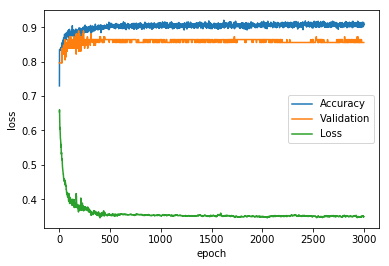

In [327]:
plt.plot(history.history['acc'], label = 'Accuracy')
plt.plot(history.history['val_acc'], label = 'Validation')
plt.plot(history.history['val_loss'], label = 'Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
print(np.min(history.history['val_loss']))
plt.show()

In [721]:
###Weights 2
evals = [1 if i > 0.1 else 0 for i in predicts]
cf = confusion_matrix(y_test, evals)
cf

array([[172,  83],
       [ 12,  27]])

In [309]:
###### Weights 1

evals = [1 if i > 0.5 else 0 for i in predicts]
t_cf = confusion_matrix(y_test, evals)
t_cf

array([[249,   6],
       [ 27,  12]])

In [345]:
one_prediction = model.predict(x_test[20:21])

In [346]:
one_prediction

array([[ 0.82215291]], dtype=float32)

In [541]:
###Micro

x_modified = x_test[23:24]
x_modified['JobSatisfaction'] = 0.05  ##.05
x_modified['EnvironmentSatisfaction'] = 0.05 ## .05
x_modified

/Users/ericcriteser/anaconda2/envs/deeplearning/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/ericcriteser/anaconda2/envs/deeplearning/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Age,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
277,0.478571,0.242857,0.275,0.05,0.23,0.95,0.275,0.05,0.15,0.885714,...,0.05,0.05,0.05,0.95,0.05,0.95,0.05,0.05,0.05,0.95


In [542]:
output = model.predict(x_modified)
output

array([[ 0.32943761]], dtype=float32)

In [480]:
x_test[20:21]

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
259,0.328571,0.95,0.275,0.65,0.58,0.35,0.05,0.35,0.05,0.05,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.95,0.95,0.05


In [728]:
###Macro
macro_df = x_test.copy()

In [729]:
###Macro
#macro_df['OverTime_No'] = 0.95#macro_df['OverTime_No']*1.5
#macro_df['OverTime_Yes'] = 0.05
macro_df['BusinessTravel_Non-Travel'] = 0.95
macro_df['BusinessTravel_Travel_Rarely'] = 0.05
macro_df['BusinessTravel_Travel_Frequently'] = 0.05
macro_df.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
1041,0.264286,0.178571,0.500,0.95,0.744286,0.65,0.275,0.05,0.05,0.500000,...,0.05,0.05,0.05,0.95,0.05,0.05,0.05,0.95,0.95,0.05
184,0.800000,0.435714,0.275,0.95,0.397143,0.95,0.275,0.05,0.15,0.050000,...,0.95,0.05,0.05,0.05,0.05,0.95,0.05,0.05,0.95,0.05
1222,0.178571,0.725000,0.050,0.95,0.410000,0.05,0.050,0.65,0.15,0.050000,...,0.05,0.05,0.05,0.05,0.05,0.05,0.95,0.05,0.95,0.05
67,0.628571,0.242857,0.500,0.35,0.422857,0.65,0.500,0.05,0.25,0.435714,...,0.05,0.05,0.95,0.05,0.05,0.95,0.05,0.05,0.95,0.05
220,0.435714,0.178571,0.275,0.95,0.461429,0.65,0.275,0.35,0.85,0.371429,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.95,0.95,0.05


In [730]:
###Macro
new_predicts = model.predict(macro_df)
turnover = []
for i in new_predicts:
    if i > 0.1:
        turnover.append(i)
len(turnover)

51

In [71]:
y_train.tail()

,0
1171,0
1172,0
1173,1
1174,0
1175,0


In [88]:
z_train = np.array(y_train)

1176